In [1]:
import os, sys
sys.path.append('../')
from tqdm import tqdm
import random
from env import *
# from algorithms.lsvi_phe import *
# from algorithms.lsvi_ucb import *
# from algorithms.uc_matrixrl import *
# from algorithms.ucrl_mnl import *
# from algorithms.ucrl_vtr import *
from algorithms.ucmlk import *
from algorithms.optimal_policy import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.getcwd())
print(os.listdir())

/Users/optalab/Documents/UCMLK/search
['Optimal_hard.ipynb', 'UCMLK.ipynb', 'UCRL2-VTR.ipynb', 'Optimal.ipynb', 'UCRL2.ipynb', 'UCRL2_hard.ipynb', 'UCRL-MNL.ipynb', '.ipynb_checkpoints', 'TSDE.ipynb', 'UCRL2-VTR_hard.ipynb', 'UCMLK_hard.ipynb']


In [3]:
nState = 6
T = 1000
env = make_riverSwim(T=T, nState=nState)
# env = make_randomMDP(T=Round, nState=7, nAction=2, reward_range=(0,1), sparsity=0.3)
# env = make_hardToLearnMDP(T=Round)
runs = 10
seeds = [1234*(i+1) for i in range(runs)]

In [4]:
run_returns = []

for run in tqdm(range(runs)):
    
    random.seed(seeds[run])
        
    agent = UCMLK(env, c=1e-2, gamma=0.9, N=10, eta=0.01 , T=T)    
    episodic_return = agent.run()
    run_returns.append(episodic_return)
#     np.save('../data/exp1/UCMLK/return'+str(run)+'.npy', episodic_return)
    np.save('/Users/optalab/Documents/UCMLK/data/riverSwim/S=' + str(nState)+ ', T=' + str(10000) +'/UCMLK/return'+str(run)+'.npy', episodic_return)
    # np.save('C:/Users/uqpua/OneDrive/Desktop/UCMLK/data/riverSwim/S=' + str(nState)+ ', T=' + str(10000) +'/UCMLK/return'+str(run)+'.npy', state_return)



  0%|          | 0/10 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

UCMLK


  0%|          | 0/1000 [00:00<?, ?it/s]

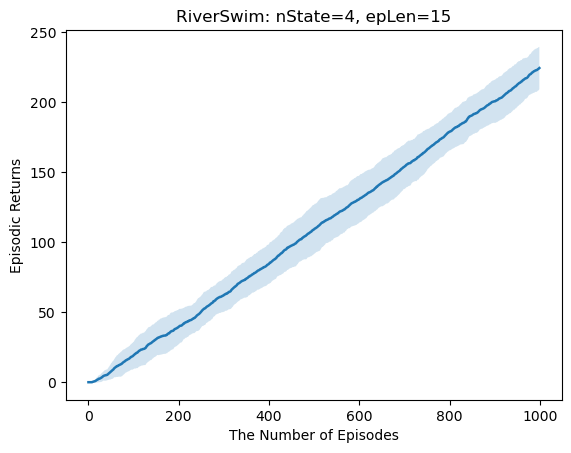

In [6]:
episodes = np.arange(T)

plt.figure()
data_mean = np.mean(run_returns, axis=0)
data_std = np.std(run_returns, axis=0)
    
plt.fill_between(episodes, data_mean + data_std, data_mean - data_std, alpha=0.2)
plt.plot(episodes, data_mean, linewidth=1.8)
plt.title("RiverSwim: nState=4, epLen=15")
plt.xlabel("The Number of Episodes")

plt.ylabel("Episodic Returns")
plt.show()